# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [51]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg')
w, h = img.size
img = img.resize((w//4, h//4))

x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

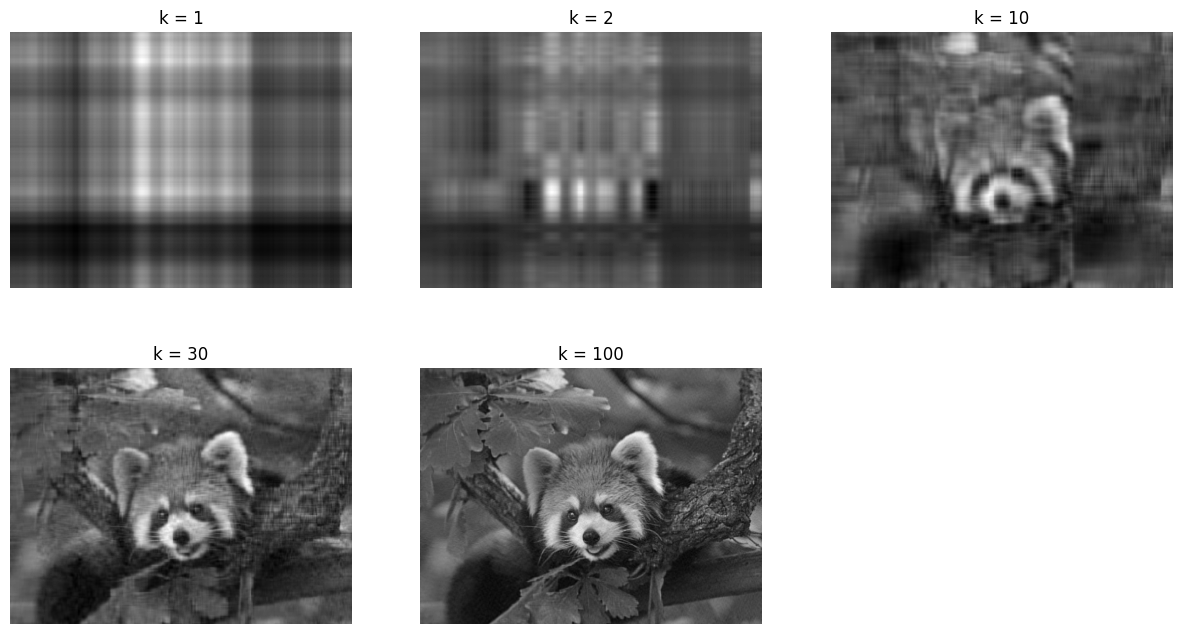

Размер исходного изображения: 1102500 байт
Размер сжатого изображения при k=1: 9808 байт
Размер сжатого изображения при k=2: 19616 байт
Размер сжатого изображения при k=10: 98080 байт
Размер сжатого изображения при k=30: 294240 байт
Размер сжатого изображения при k=100: 980800 байт


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = 'panda.jpg'
image = Image.open(image_path)
image_array = np.array(image)
gray_image = np.mean(image_array, axis=2)

U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)
k_values = [1, 2, 10, 30, 100]
plt.figure(figsize=(15, 8))

def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

for i, k in enumerate(k_values):
    compressed_image = reconstruct_image(U, S, Vt, k)
    plt.subplot(2, 3, i + 1)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')
plt.show()


original_size = image_array.nbytes
compressed_sizes = []
for k in k_values:
    compressed_size = (U[:, :k].nbytes + S[:k].nbytes + Vt[:k, :].nbytes)
    compressed_sizes.append(compressed_size)

print(f'Размер исходного изображения: {original_size} байт')
for k, size in zip(k_values, compressed_sizes):
    print(f'Размер сжатого изображения при k={k}: {size} байт')